C:\Users\swath\AppData\Local\Temp\ipykernel_16640\4125038876.py:9: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Combined_Less.csv')  # Change path as needed


Random Forest MSE: 0.0444


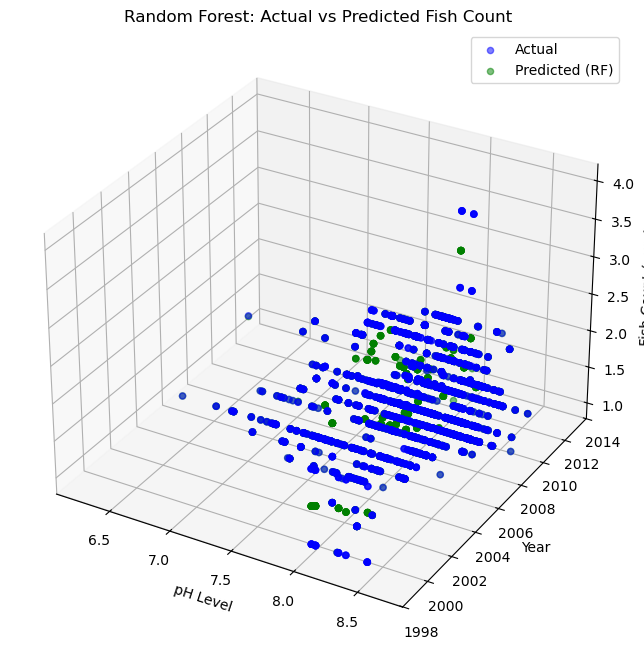

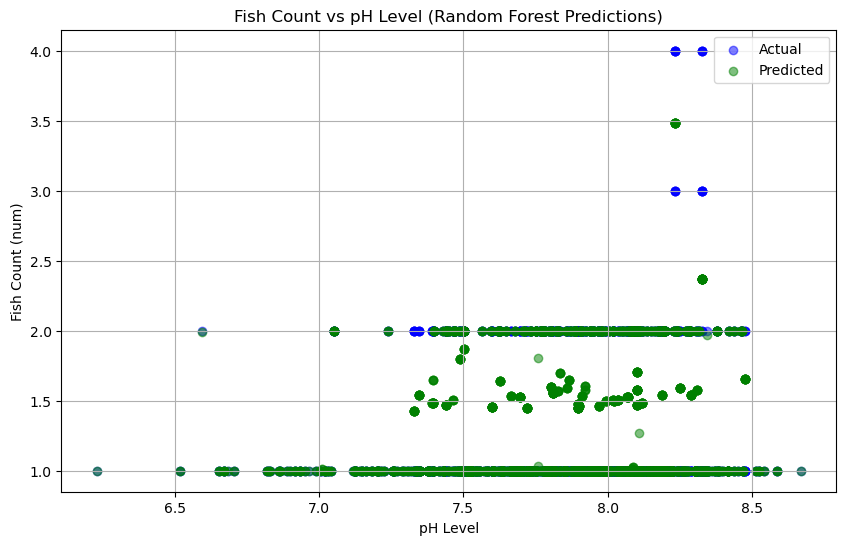

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


df = pd.read_csv('Combined_Less.csv')  # Change path as needed

# Select and clean data
df = df[['PHSTVL', 'YEAR', 'num']].dropna()

# Features and target
X = df[['PHSTVL', 'YEAR']]
y = df['num']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest MSE: {mse:.4f}")

# 3D Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['PHSTVL'], X_test['YEAR'], y_test, c='blue', label='Actual', alpha=0.5)
ax.scatter(X_test['PHSTVL'], X_test['YEAR'], y_pred, c='green', label='Predicted (RF)', alpha=0.5)
ax.set_xlabel('pH Level')
ax.set_ylabel('Year')
ax.set_zlabel('Fish Count (num)')
ax.set_title('Random Forest: Actual vs Predicted Fish Count')
ax.legend()
plt.show()

# 2D Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test['PHSTVL'], y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(X_test['PHSTVL'], y_pred, color='green', alpha=0.5, label='Predicted')
plt.xlabel('pH Level')
plt.ylabel('Fish Count (num)')
plt.title('Fish Count vs pH Level (Random Forest Predictions)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions already made: y_pred = rf.predict(X_test)

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Random Forest Regression Accuracy Metrics:")
print(f" - Mean Squared Error (MSE): {mse:.4f}")
print(f" - Mean Absolute Error (MAE): {mae:.4f}")
print(f" - R² Score: {r2:.4f}")  # Closer to 1 means better accuracy


Random Forest Regression Accuracy Metrics:
 - Mean Squared Error (MSE): 0.0444
 - Mean Absolute Error (MAE): 0.0775
 - R² Score: 0.8171
